## WORKING ON CLASSIFICATION MODEL TO MAKE PREDICTION 

Following the learning outcome gained using the course material "UNDERSTANDING DATA SCIENCE FOR MACHINE LEARNING PATH" ON MICROSOFT,  I trained the logistic model to perform a classification task to predict the use of bank account within data used for the model.

## Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

## COLUMN EXPLANATION

1. country - Country the interviewee is in
2. year - Year Survey is done
3. uniqueid - unique identifier for each interviewee
4. location_type - Type of location (Urban/Rural)
5. cellphone_access - if the interviewee has access to a cell phone (Yes/No)
6. household_size - Number of people living in one house
7. age_of_respondent - The age of the interviewee
8. gender_of_respondent - Gender of the interviewee (Male or Female)
9. relationship_with_head - The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Don't know
10. marital status - The marital status of the interviewee: Married/Living together, Divorced or Separated, Widowed, Single/Never married, Don't know
11. education_level - The highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, tertiary education, Other/Dont know/RTA
12. job_type - The type of job the interviewee has: Farming and Fishing, Self-employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Don't know/Refuse to answer
13. bank_account - the variable to predict

## IMPORTING THE DATASET

In [223]:
import pandas as pd
from ydata_profiling import ProfileReport

In [51]:
data = pd.read_csv("Financial_inclusion_dataset.csv")

data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## DATA EXPLORATION

In [52]:
#information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### The data has 13 columns and 23524 rows.. There are three columns with numerical data type and 10 non-numerical data type. 

In [53]:
#first five rows of the dataset
#last five rows of the dataset

print(data.head())

print(data.tail())

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relativ

In [54]:
#summarization of statistical analysis
data.describe()


,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [55]:
#profile report
Report = ProfileReport(data)
Report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
#making a copy of the original data 
data_1 = data.copy()
data_1

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## DATA VISUALIZATION BEFORE TRANSFORMATION

In [57]:
#Using scattered plot to view the relationship between the numerical data
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

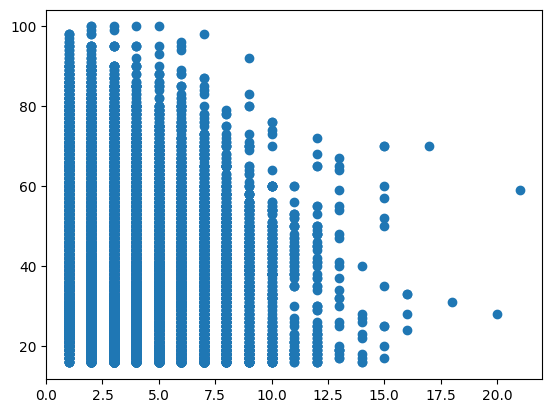

In [58]:

plt.scatter(data_1["household_size"], data_1["age_of_respondent"])
plt.show()

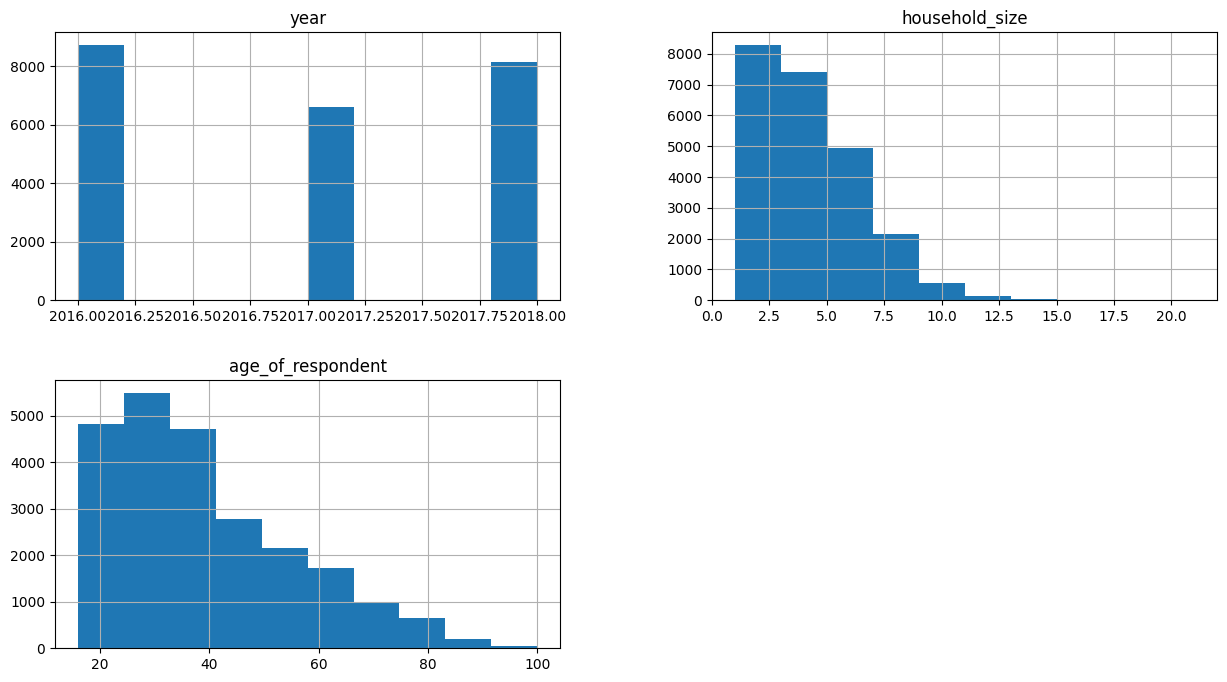

In [59]:
#showing distribution of each numerical column
data_1.hist(figsize = (15,8));

## DATA TRANSFORMATION 

In [60]:
#Checking missing values 
data_1.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

### No missing values.

In [61]:
#checking duplicates
data_1.duplicated().sum()

0

### No duplicate rows

Text(0, 0.5, 'Frequency')

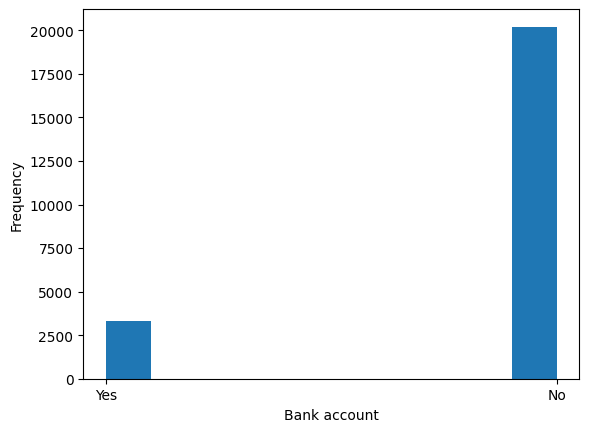

In [62]:
#checking if our dataset is balanced 
plt.hist(data_1["bank_account"], label = 'Splitted Data');
plt.xlabel('Bank account')
plt.ylabel('Frequency')

### From our result, we can see that our label isn't balanced and imbalnced data in the label can cause bias in our prediction.

In [63]:
#Transforming categorical data to numerical
#Mapping Yes to 1 and No to 0 for our target variable/label
data_1["bank_account"] = data_1["bank_account"].str.strip().map({"No": 0, "Yes": 1})

In [64]:
data_1.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


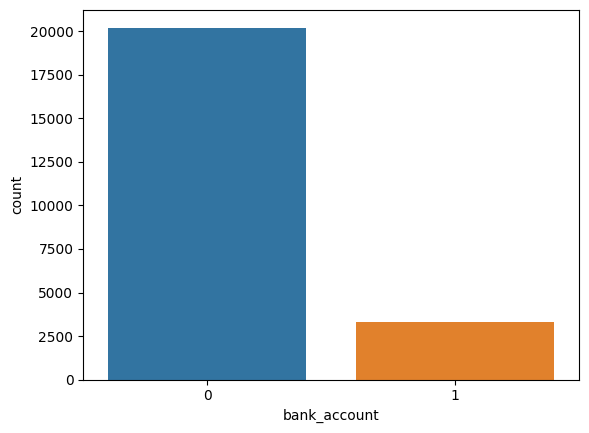

In [65]:
sns.countplot(data = data_1, x = "bank_account");
#The data is more of No which is 0 than o Yes which is one in our label(imbalanced)

### Imbalanced data leads to bias in prediction

In [66]:
#making our dataset balanced 
With_bank_account = data_1[data_1["bank_account"] == 1] 
No_bank_account = data_1[data_1["bank_account"] == 0]
# take a random sampling of No bank account the same size as the With bank account subset
No_bank_account = No_bank_account.sample(n=len(With_bank_account.index), random_state=1)
balanced_data = pd.concat([With_bank_account, No_bank_account])


In [67]:
#viewing the data

balanced_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,1,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,1,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,1,Rural,Yes,6,27,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [68]:
data_1.year.nunique()

3

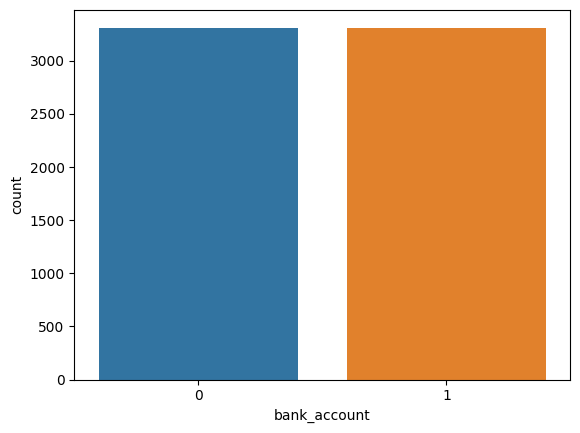

In [69]:
#plotting frequency for the target variable or label data.
sns.countplot(data = balanced_data, x = "bank_account");


### From our plot, we can see that we have a balanced data and we can train our data

In [70]:
#checking corelation with the numerical data
balanced_data.select_dtypes("number").corr()

,year,bank_account,household_size,age_of_respondent
year,1.000000,0.161048,-0.102329,-0.006633
bank_account,0.161048,1.000000,-0.048780,0.040069
household_size,-0.102329,-0.048780,1.000000,-0.075506
age_of_respondent,-0.006633,0.040069,-0.075506,1.000000


<Axes: >

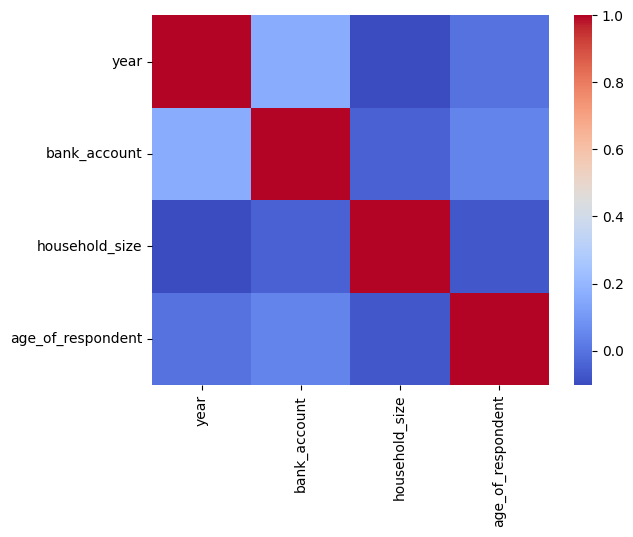

In [71]:
#heatmap showing corelation between numerical variables 
sns.heatmap(balanced_data.select_dtypes("number").corr(), cmap = "coolwarm")

In [72]:
#dropping the column with not much importance
balanced_data = balanced_data.drop(columns = ["uniqueid"])
balanced_data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,1,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,1,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,1,Rural,Yes,6,27,Female,Head of Household,Married/Living together,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...
11693,Rwanda,2016,0,Rural,Yes,6,24,Female,Child,Single/Never Married,Secondary education,Other Income
6797,Rwanda,2016,0,Rural,Yes,3,28,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing
13073,Rwanda,2016,0,Rural,Yes,3,17,Female,Child,Single/Never Married,Secondary education,Farming and Fishing
8315,Rwanda,2016,0,Urban,Yes,3,24,Female,Spouse,Married/Living together,Primary education,Remittance Dependent


In [73]:
#ENCODING OTHER CATEGORICAL DATA TO NUMERICAL
from sklearn.preprocessing import LabelEncoder

def encode_categorical(balanced_data):
    # Create a copy of the input DataFrame
    encoded_data = balanced_data
    
   # Initialize LabelEncoder
    encoder = LabelEncoder()
    for column in encoded_data.columns:
    # Check if the column dtype is object (categorical)
        if encoded_data[column].dtype == 'object':
    # Fit and transform LabelEncoder on the column
            encoded_data[column] = encoder.fit_transform(encoded_data[column])
    
    return encoded_data

In [74]:
#calling the function 
encode_categorical(balanced_data)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
2,0,2018,1,1,1,5,26,1,3,3,5,9
8,0,2018,1,0,1,3,54,1,1,2,3,1
11,0,2018,1,0,1,3,69,1,1,2,3,7
17,0,2018,1,0,1,6,27,0,1,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
11693,1,2016,0,0,1,6,24,0,0,3,3,7
6797,1,2016,0,0,1,3,28,0,5,2,3,1
13073,1,2016,0,0,1,3,17,0,0,3,3,1
8315,1,2016,0,1,1,3,24,0,5,2,2,8


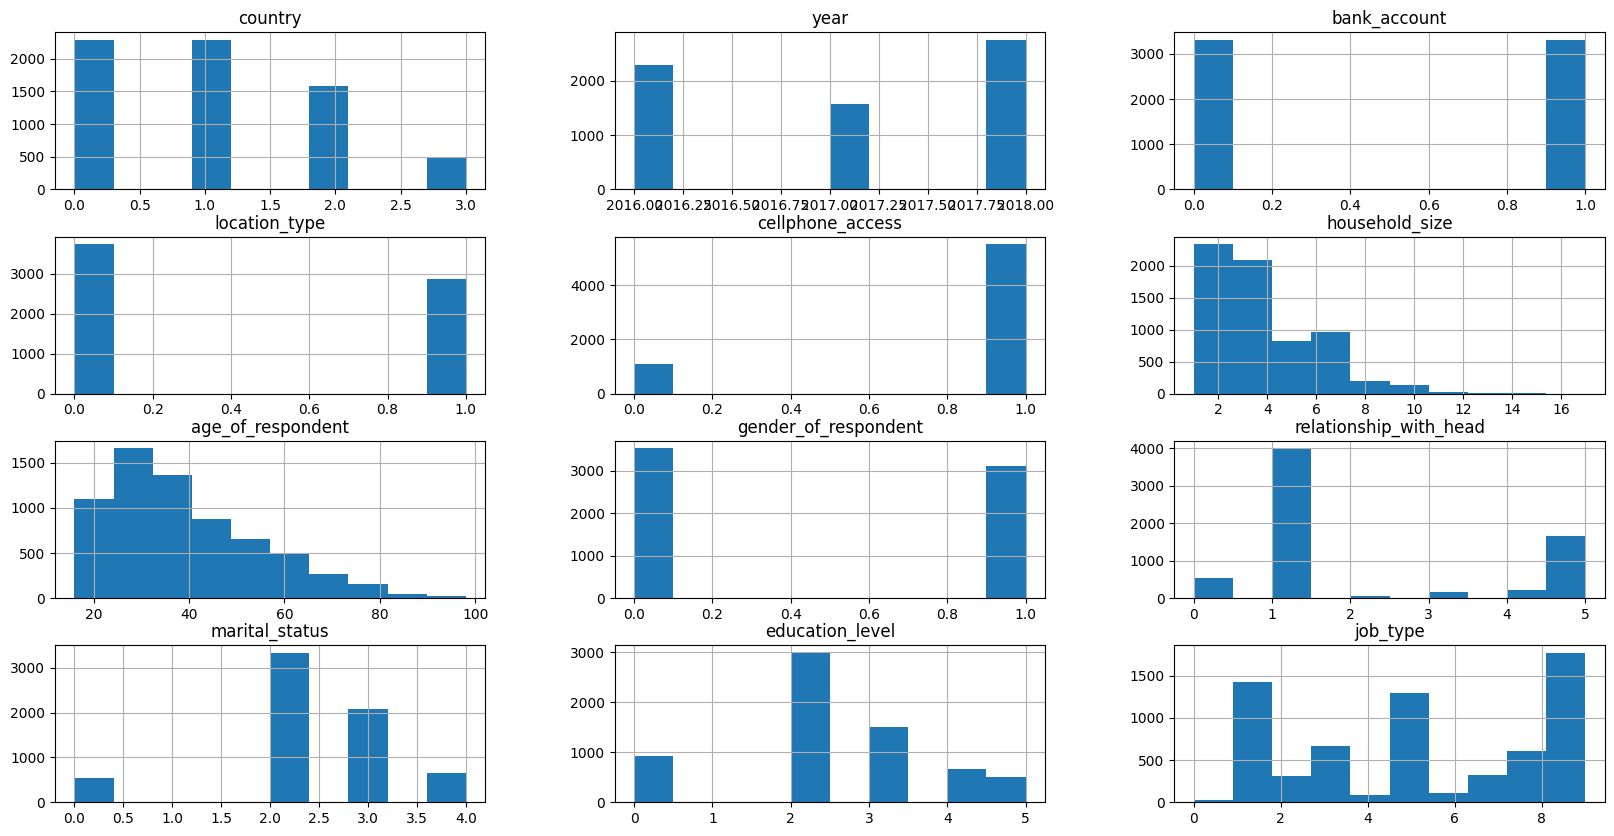

In [75]:
#visualizing the distribution
balanced_data.hist(figsize = (20,10));

## MODELLING

In [76]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.model_selection import train_test_split

In [79]:
# Split the dataset in an 70/30 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(balanced_data, test_size=0.2, random_state=21)

train.head()



,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
11020,1,2016,1,0,1,5,44,1,1,2,3,5
13328,1,2016,1,0,1,5,25,0,1,3,3,8
11856,1,2016,0,0,1,3,65,0,1,4,0,1
818,0,2018,1,0,1,5,40,0,5,2,3,2
9560,1,2016,1,1,1,8,31,1,1,2,2,5


In [80]:
test.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
369,0,2018,0,0,1,4,71,0,5,2,2,1
7156,1,2016,0,0,1,9,43,0,5,2,2,8
2771,0,2018,0,1,1,5,25,1,1,2,2,9
9616,1,2016,1,0,1,5,59,0,0,4,0,1
5057,0,2018,1,0,0,3,80,0,1,4,0,8


In [81]:
import sklearn
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf

In [143]:
#Performing logistic regression 
model = smf.logit("bank_account ~ country + year + location_type + cellphone_access + household_size + age_of_respondent + relationship_with_head + marital_status + education_level + job_type", train).fit()

Optimization terminated successfully.
         Current function value: 0.515198
         Iterations 7


### MODEL EVALUATION 

In [145]:
# Calculate accuracy
def calculate_accuracy(model):
    
    
    # Make estimations and convert to categories
    bank_account_predicted = model.predict(test) > 0.5

    # We can use sklearn to calculate accuracy for us
    print("Accuracy:", accuracy_score(test.bank_account, bank_account_predicted))

calculate_accuracy(model)

Accuracy: 0.7509433962264151


In [146]:
#Getting summary information 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bank_account   No. Observations:                 5299
Model:                          Logit   Df Residuals:                     5288
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                  0.2567
Time:                        13:34:43   Log-Likelihood:                -2730.0
converged:                       True   LL-Null:                       -3672.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -141.4528     83.890     -1.686      0.092    -305.874      22.969
country                   -0.3681      0.041     -9.069      0.000      -0.448      -0.289
year                       0.0681      0.042      1.637      0.102      -0.013       0.150
location_type              0.4095      0.073      5.599      0.000       0.266       0.553
cellphone_access           1.9885      0.125     15.901      0.000       1.743       2.234
household_size            -0.0248      0.016     -1.583      0.113      -0.055       0.006
age_of_respondent          0.0276      0.002     11.358      0.000       0.023       0.032
relationship_with_head    -0.0527      0.019     -2.817      0.005      -0.089      -0.016
marital_status            -0.0392      0.036     -1.079      0.281      -0.110       0.032
education_level            0.8118      0.034     23.810      0.000       0.745       0.879
job_type                  -0.0218      0.012     -1.829      0.067      -0.045       0.002
==========================================================================================
"""

#### Looking at the P column, recalling that values less than 0.05 means we can be confident that this parameter is helping the model make better predictions. Education_level, location_type, cellphone_access, and age_of_respondent have smaller P values meaning they are useful predictors and in the coef, they have positive values. 

## IMPROVING MODEL PERFORMACE

### Simplifying our model

In [167]:
# Perform logistic regression.
#Using the features with low P value. 
model_simplified = smf.logit("bank_account ~ location_type + cellphone_access + education_level + age_of_respondent + relationship_with_head * year",  train).fit()
calculate_accuracy(model_simplified)

Optimization terminated successfully.
         Current function value: 0.524871
         Iterations 8
Accuracy: 0.7396226415094339


The accuracy performance is similar to the previous model accuracy but the previous is higher than it.

In [168]:
model_simplified.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bank_account   No. Observations:                 5299
Model:                          Logit   Df Residuals:                     5291
Method:                           MLE   Df Model:                            7
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                  0.2428
Time:                        13:58:05   Log-Likelihood:                -2781.3
converged:                       True   LL-Null:                       -3672.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -579.3824    113.373     -5.110      0.000    -801.590    -357.174
location_type                   0.3305      0.068      4.835      0.000       0.197       0.464
cellphone_access                2.1185      0.124     17.140      0.000       1.876       2.361
education_level                 0.8084      0.034     23.857      0.000       0.742       0.875
age_of_respondent               0.0286      0.002     12.075      0.000       0.024       0.033
relationship_with_head        118.5801     40.393      2.936      0.003      39.411     197.750
year                            0.2848      0.056      5.067      0.000       0.175       0.395
relationship_with_head:year    -0.0588      0.020     -2.937      0.003      -0.098      -0.020
===============================================================================================
"""

## ASSESS WITH COST FUNCTION

In [170]:
#using model_simplified
# Make predictions from the test set
predictions= model.predict(test)

# Calculate log loss
print("Log loss", log_loss(test.bank_account, predictions))

Log loss 0.4930560363087337


### We can see from our output that we have a low log loss which means that our model is performing good and we are confident at giving right answer 

## ASSESS THE ACCURACY

In [187]:
import numpy

# Print a few predictions before we convert them to categories
print(f"First three predictions (probabilities): {predictions.iloc[0]}, {predictions.iloc[1]}, {predictions.iloc[2]}")

# convert to absolute values
bank_account_predicted = predictions >= 0.5

# Print a few predictions converted into categories


print(f"First three predictions (categories): {bank_account_predicted.iloc[0]}, {bank_account_predicted.iloc[1]}, {bank_account_predicted.iloc[2]}")

First three predictions (probabilities): 0.7393753185427637, 0.3749600809692845, 0.548291777576347
First three predictions (categories): True, False, True


In [188]:
# Calculate what proportion were predicted correctly
guess_was_correct = test.bank_account == bank_account_predicted
accuracy = numpy.average(guess_was_correct)

# Print the accuracy
print("Accuracy for whole test dataset:", accuracy)

Accuracy for whole test dataset: 0.7509433962264151


### The model is predicting the correct answer 75% of the time

In [191]:
#Predicting analysis
#False Negative: calculate how often it guessed no bank_account when there was actually one.
false_negative = numpy.average(numpy.logical_not(guess_was_correct) & test.bank_account)

# False positive: calculate how often it guessed there was a bank account, when there was none
false_positive = numpy.average(numpy.logical_not(guess_was_correct) & numpy.logical_not(test.bank_account))


print(f"Wrongly predicted a bank account {false_positive * 100}% of the time")
print(f"Failed to predict bank accoount {false_negative * 100}% of the time")

Wrongly predicted a bank account 12.981132075471699% of the time
Failed to predict bank accoount 11.924528301886793% of the time


In [209]:
from sklearn.metrics import confusion_matrix

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
actual = test.bank_account
predictions = model.predict(test) > 0.5
#0.5 is the threeshold
cm = confusion_matrix(actual, predictions, normalize=None)

print("Confusion matrix for the test set:")
cm


Confusion matrix for the test set:


array([[478, 172],
       [158, 517]], dtype=int64)

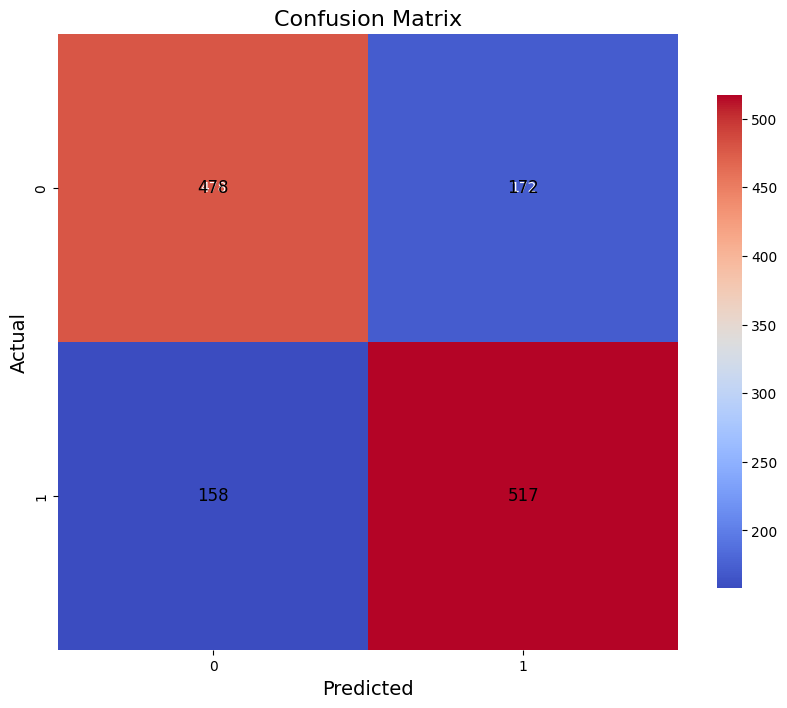

In [222]:
#plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# "Add this line to display FP and TP."
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()